In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
gold = pd.read_csv('Gold_Price.csv')

In [3]:
gold

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,1672.800049,1693.800049,1670.000000,1687.900024,1687.900024,35
1,2013-01-03,1686.099976,1686.800049,1662.000000,1673.699951,1673.699951,140
2,2013-01-04,1647.000000,1658.300049,1625.699951,1648.099976,1648.099976,199
3,2013-01-07,1656.500000,1659.900024,1643.800049,1645.500000,1645.500000,49
4,2013-01-08,1647.699951,1661.500000,1647.699951,1661.500000,1661.500000,17
...,...,...,...,...,...,...,...
2668,2023-08-14,1909.300049,1912.599976,1903.300049,1910.599976,1910.599976,46
2669,2023-08-15,1906.000000,1907.699951,1895.000000,1902.500000,1902.500000,73
2670,2023-08-16,1904.500000,1904.500000,1890.300049,1896.099976,1896.099976,22
2671,2023-08-17,1893.699951,1902.400024,1884.000000,1884.099976,1884.099976,245


In [4]:
gold_price = gold[['Date','Close']]

In [5]:
gold_price

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


In [6]:
gold_price.shape

(2673, 2)

In [7]:
gold_price.isna().sum()

Date     0
Close    0
dtype: int64

In [8]:
gold_price.dtypes

Date      object
Close    float64
dtype: object

In [9]:
gold_price['Date'] = pd.to_datetime(gold_price['Date'])

In [10]:
gold_price.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

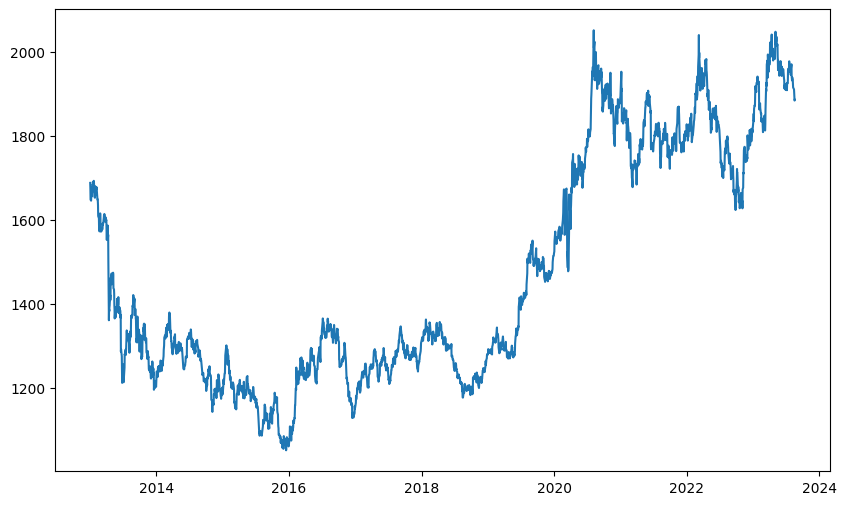

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(gold_price['Date'],gold_price['Close'])

In [17]:
! pip install pmdarima

     ------------------------------------ 566.2/566.2 kB 423.4 kB/s eta 0:00:00
     ---------------------------------------- 2.8/2.8 MB 1.1 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pmdarima as pm

In [13]:
stepwise = pm.auto_arima(gold_price['Close'],trace=True,error_action='ignore',suppress_warnings=True)
print(stepwise.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=22016.007, Time=2.67 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=22015.214, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=22013.871, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=22013.827, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=22013.280, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=22015.798, Time=1.54 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 4.918 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2673
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -11005.640
Date:                Wed, 23 Aug 2023   AIC                          22013.280
Time:                        08:13:01   BIC                          22019.171
Sample:                             0   HQIC                         22015.412
    

In [15]:
gold_price.shape

(2673, 2)

In [18]:
gold_train=gold_price.head(1870)

In [19]:
gold_train

,Date,Close
0,2013-01-02,1687.900024
1,2013-01-03,1673.699951
2,2013-01-04,1648.099976
3,2013-01-07,1645.500000
4,2013-01-08,1661.500000
...,...,...
1865,2020-06-04,1718.900024
1866,2020-06-05,1676.199951
1867,2020-06-08,1698.300049
1868,2020-06-09,1714.699951


In [20]:
gold_test = gold_price.tail(803)

In [21]:
gold_test

,Date,Close
1870,2020-06-11,1732.000000
1871,2020-06-12,1729.300049
1872,2020-06-15,1720.300049
1873,2020-06-16,1729.599976
1874,2020-06-17,1729.199951
...,...,...
2668,2023-08-14,1910.599976
2669,2023-08-15,1902.500000
2670,2023-08-16,1896.099976
2671,2023-08-17,1884.099976


In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [29]:
model_arima = ARIMA(gold_train['Close'],order=(3,0,1))

In [30]:
model_fit = model_arima.fit()

In [31]:
forecast_steps = len(gold_test) 
forecast = model_fit.forecast(steps=forecast_steps)

In [33]:
from sklearn.metrics import mean_squared_error

In [36]:
mse = mean_squared_error(gold_test['Close'], forecast)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 320.0734816758229


In [37]:
mse

102447.03367208334

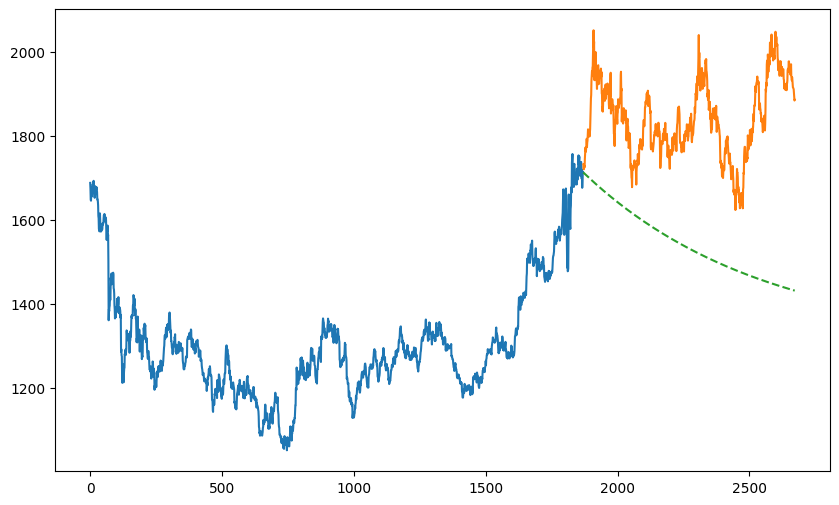

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(gold_train.index, gold_train["Close"], label="Training Data")
plt.plot(gold_test.index, gold_test["Close"], label="Test Data")
plt.plot(gold_test.index, forecast, label="Forecast", linestyle='dashed')
plt.show()

In [38]:
forecast_steps = 200
forecast = model_fit.forecast(steps=forecast_steps)

In [39]:
print(forecast)

1870    1712.845229
1871    1712.163267
1872    1711.619615
1873    1710.987977
1874    1710.414861
           ...     
2065    1611.308833
2066    1610.859999
2067    1610.411827
2068    1609.964315
2069    1609.517463
Name: predicted_mean, Length: 200, dtype: float64
